# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score, recall_score, f1_score,
    precision_recall_curve, roc_curve, confusion_matrix, make_scorer
)

# –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á

In [2]:
# —Ñ–∞–π–ª —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
df = pd.read_parquet('transaction_fraud_data.parquet')

# –∫—É—Ä—Å –≤–∞–ª—é—Ç
currency_df = pd.read_parquet('historical_currency_exchange.parquet')

## –ó–∞–¥–∞—á–∞ 61. –°–≤–æ–±–æ–¥–Ω–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö (–≤–Ω–µ —Ç–∞–π–º–∏–Ω–≥–∞)

### –ó–∞–¥–∞–Ω–∏–µ: –ø—Ä–æ–≤–µ—Å—Ç–∏ —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö, –ø—Ä–∏–¥—É–º–∞—Ç—å –ø—Ä–æ–¥—É–∫—Ç–æ–≤—ã–µ –∏ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ –≥–∏–ø–æ—Ç–µ–∑—ã ‚Äî –∫–∞–∫—É—é —Ü–µ–Ω–Ω–æ—Å—Ç—å –º–æ–∂–µ—Ç–µ –∏–∑–≤–ª–µ—á—å –∏–∑ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–∏–ª–∞ –¥–∞–Ω–Ω—ã–µ.

–ü–æ–ª—å–∑—É–π—Ç–µ—Å—å –ª—é–±—ã–º —É–¥–æ–±–Ω—ã–º –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞—Ä–∏–µ–º –ø—Ä–∏ —Ä–µ—à–µ–Ω–∏–∏ –∑–∞–¥–∞—á–∏ –∏ –æ–ø–∏—à–∏—Ç–µ –≤ README –∫–∞–∫ —Ä–µ—à–∞–ª–∏ –∑–∞–¥–∞—á—É, —á–µ–º –ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –ø—Ä–∏ —Ä–µ—à–µ–Ω–∏–∏ –∏ –∫–∞–∫ –ø—Ä–∏–Ω–∏–º–∞–ª–∏ —Ä–µ—à–µ–Ω–∏—è.

In [60]:
currency_df

date       AUD       BRL       CAD       EUR       GBP         JPY  \
0   2024-09-30  1.443654  5.434649  1.351196  0.895591  0.747153  142.573268   
1   2024-10-01  1.442917  5.444170  1.352168  0.897557  0.746956  143.831429   
2   2024-10-02  1.449505  5.425444  1.348063  0.903056  0.752241  143.806861   
3   2024-10-03  1.456279  5.442044  1.351451  0.906018  0.754584  146.916773   
4   2024-10-04  1.460930  5.477788  1.355260  0.906452  0.761891  146.592323   
5   2024-10-05  1.471447  5.457431  1.358726  0.910593  0.761939  148.796290   
6   2024-10-06  1.469948  5.463070  1.357479  0.910655  0.762157  148.725322   
7   2024-10-07  1.469358  5.455679  1.357600  0.911148  0.761611  148.509087   
8   2024-10-08  1.479802  5.495973  1.361858  0.910451  0.763520  147.888136   
9   2024-10-09  1.484282  5.535464  1.365741  0.911611  0.763666  148.274271   
10  2024-10-10  1.487595  5.597276  1.371040  0.913740  0.764894  149.176698   
11  2024-10-11  1.484251  5.583092  1.375260  0.914911  0.765915  148.579235   
12  2024-10-12  1.481060  5.611784  1.376385  0.913296  0.765312  149.142242   
13  2024-10-13  1.481516  5.625377  1.376359  0.914137  0.765346  149.163567   
14  2024-10-14  1.484199  5.612327  1.377943  0.915399  0.766102  149.168474   
15  2024-10-15  1.486305  5.596201  1.379823  0.916792  0.765306  149.523126   
16  2024-10-16  1.496513  5.653631  1.378417  0.918318  0.765093  149.025816   
17  2024-10-17  1.492143  5.669771  1.375184  0.920552  0.769540  149.342277   
18  2024-10-18  1.491675  5.653828  1.379385  0.923189  0.768145  149.951370   
19  2024-10-19  1.490596  5.692491  1.380234  0.919512  0.765986  149.542206   
20  2024-10-20  1.490907  5.689223  1.380287  0.920088  0.766265  149.527894   
21  2024-10-21  1.487740  5.637270  1.380375  0.920155  0.766249  149.147331   
22  2024-10-22  1.500639  5.689757  1.383147  0.924220  0.769855  150.683899   
23  2024-10-23  1.498948  5.690853  1.382647  0.926268  0.770607  151.744645   
24  2024-10-24  1.506202  5.689930  1.382894  0.927316  0.773928  152.724433   
25  2024-10-25  1.506748  5.665660  1.384859  0.923876  0.770909  151.903627   
26  2024-10-26  1.513840  5.708040  1.389294  0.925752  0.771547  152.268731   
27  2024-10-27  1.514088  5.707994  1.389221  0.926135  0.771502  152.283657   
28  2024-10-28  1.515760  5.708373  1.389687  0.926519  0.771935  153.800613   
29  2024-10-29  1.518902  5.711547  1.388779  0.924510  0.770736  152.951742   
30  2024-10-30  1.522229  5.761654  1.390965  0.923864  0.768083  153.160003   

          MXN          NGN        RUB       SGD  USD  
0   19.694724  1668.736400  94.133735  1.280156    1  
1   19.667561  1670.694524  92.898519  1.284352    1  
2   19.606748  1669.653006  94.583198  1.286983    1  
3   19.457701  1670.097873  95.655442  1.294391    1  
4   19.363467  1649.763738  94.755337  1.296800    1  
5   19.286645  1619.465727  94.934698  1.303670    1  
6   19.284784  1626.760323  94.993467  1.304541    1  
7   19.263497  1658.088878  95.582401  1.303118    1  
8   19.297377  1626.621519  96.167634  1.302788    1  
9   19.357738  1620.528912  96.750546  1.304275    1  
10  19.465534  1620.288429  97.076400  1.306731    1  
11  19.457569  1620.553279  96.608874  1.306209    1  
12  19.287951  1639.315783  95.683504  1.305143    1  
13  19.277162  1619.450022  95.818212  1.304986    1  
14  19.301100  1620.334223  96.250849  1.305672    1  
15  19.416737  1635.134961  95.165613  1.308048    1  
16  19.711436  1635.438782  96.939582  1.308750    1  
17  19.895284  1635.903564  97.330418  1.311236    1  
18  19.819733  1636.731886  97.211085  1.314172    1  
19  19.880298  1645.268713  95.880596  1.310179    1  
20  19.883334  1637.845302  95.319348  1.310248    1  
21  19.892753  1634.657490  95.891940  1.309439    1  
22  19.957118  1642.553927  96.798098  1.315318    1  
23  19.967148  1644.825044  95.749323  1.317586    1  
24  19.831042  1642.896306  95.922769  1.321859    1  
25  19.824089  1642

In [61]:
df

transaction_id customer_id       card_number  \
0          TX_a0ad2a2a  CUST_72886  6646734767813109   
1          TX_3599c101  CUST_70474   376800864692727   
2          TX_a9461c6d  CUST_10715  5251909460951913   
3          TX_7be21fc4  CUST_16193   376079286931183   
4          TX_150f490b  CUST_87572  6172948052178810   
...                ...         ...               ...   
7483761    TX_58a762fa  CUST_11344   377055034743699   
7483762    TX_dabcf671  CUST_38961   373625915641065   
7483763    TX_ab567eb4  CUST_75576  6702342842796660   
7483764    TX_5ae61846  CUST_82508   374615717295581   
7483765    TX_54fccca9  CUST_20139   373017396639208   

                         timestamp vendor_category vendor_type  \
0       2024-09-30 00:00:01.034820      Restaurant   fast_food   
1       2024-09-30 00:00:01.764464   Entertainment      gaming   
2       2024-09-30 00:00:02.273762         Grocery    physical   
3       2024-09-30 00:00:02.297466             Gas       major   
4       2024-09-30 00:00:02.544063      Healthcare     medical   
...                            ...             ...         ...   
7483761 2024-10-30 23:59:58.926575          Retail      online   
7483762 2024-10-30 23:59:58.950801         Grocery    physical   
7483763 2024-10-30 23:59:58.972155         Grocery    physical   
7483764 2024-10-30 23:59:58.996608          Retail      online   
7483765 2024-10-30 23:59:59.101885         Grocery      online   

                  vendor     amount currency    country  ... is_card_present  \
0              Taco Bell     294.87      GBP         UK  ...           False   
1                  Steam    3368.97      BRL     Brazil  ...           False   
2            Whole Foods  102582.38      JPY      Japan  ...           False   
3                  Exxon     630.60      AUD  Australia  ...           False   
4         Medical Center  724949.27      NGN    Nigeria  ...           False   
...                  ...        ...      ...        ...  ...             ...   
7483761       AliExpress     887.32      SGD  Singapore  ...           False   
7483762           Kroger     356.06      EUR     France  ...           False   
7483763           Kroger     391.96      SGD  Singapore  ...           False   
7483764             eBay     601.71      USD        USA  ...           False   
7483765  Walmart Grocery   40668.06      JPY      Japan  ...           False   

          device channel                device_fingerprint       ip_address  \
0        iOS App  mobile  e8e6160445c935fd0001501e4cbac8bc   197.153.60.199   
1           Edge     web  a73043a57091e775af37f252b3a32af9  208.123.221.203   
2        Firefox     web  218864e94ceaa41577d216b149722261   10.194.159.204   
3        iOS App  mobile  70423fa3a1e74d01203cf93b51b9631d   17.230.177.225   
4         Chrome     web  9880776c7b6038f2af86bd4e18a1b1a4  136.241.219.151   
...          ...     ...                               ...              ...   
7483761   Safari     web  2e37bb086e754bfaf2ec3806dcac8d98    248.8.111.152   
7483762   Chrome     web  459c67dbfbb15019df8088fc0f2ffe1d   224.123.137.90   
7483763   Safari     web  337d36a8f5e811564a1dd3c255db01dd     31.196.9.234   
7483764  Firefox     web  52874c17f4ab0846fac1aed0c66e8551     188.74.107.8   
7483765   Chrome     web  e9e0e0db1c95f5f44613492b2f931fac    205.233.99.48   

        is_outside_home_country is_high_risk_vendor is_weekend  \
0                         False               False      False   
1                          True                True      False   
2                         False               False      False   
3                         False               False      False   
4                          True               False      False   
...                         ...                 ...        ...   
7483761                   False               False      False   
7483762                   False               False      False   
7483763                   False       

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.normalize()


In [4]:
df['last_hour_num_transactions'] = df['last_hour_activity'].apply(lambda x: x['num_transactions'])
df['last_hour_total_amount'] = df['last_hour_activity'].apply(lambda x: x['total_amount'])
df['last_hour_unique_merchants'] = df['last_hour_activity'].apply(lambda x: x['unique_merchants'])
df['last_hour_unique_countries'] = df['last_hour_activity'].apply(lambda x: x['unique_countries'])
df['last_hour_max_single_amount'] = df['last_hour_activity'].apply(lambda x: x['max_single_amount'])


In [5]:
df

transaction_id customer_id       card_number  \
0          TX_a0ad2a2a  CUST_72886  6646734767813109   
1          TX_3599c101  CUST_70474   376800864692727   
2          TX_a9461c6d  CUST_10715  5251909460951913   
3          TX_7be21fc4  CUST_16193   376079286931183   
4          TX_150f490b  CUST_87572  6172948052178810   
...                ...         ...               ...   
7483761    TX_58a762fa  CUST_11344   377055034743699   
7483762    TX_dabcf671  CUST_38961   373625915641065   
7483763    TX_ab567eb4  CUST_75576  6702342842796660   
7483764    TX_5ae61846  CUST_82508   374615717295581   
7483765    TX_54fccca9  CUST_20139   373017396639208   

                         timestamp vendor_category vendor_type  \
0       2024-09-30 00:00:01.034820      Restaurant   fast_food   
1       2024-09-30 00:00:01.764464   Entertainment      gaming   
2       2024-09-30 00:00:02.273762         Grocery    physical   
3       2024-09-30 00:00:02.297466             Gas       major   
4       2024-09-30 00:00:02.544063      Healthcare     medical   
...                            ...             ...         ...   
7483761 2024-10-30 23:59:58.926575          Retail      online   
7483762 2024-10-30 23:59:58.950801         Grocery    physical   
7483763 2024-10-30 23:59:58.972155         Grocery    physical   
7483764 2024-10-30 23:59:58.996608          Retail      online   
7483765 2024-10-30 23:59:59.101885         Grocery      online   

                  vendor     amount currency    country  ...  \
0              Taco Bell     294.87      GBP         UK  ...   
1                  Steam    3368.97      BRL     Brazil  ...   
2            Whole Foods  102582.38      JPY      Japan  ...   
3                  Exxon     630.60      AUD  Australia  ...   
4         Medical Center  724949.27      NGN    Nigeria  ...   
...                  ...        ...      ...        ...  ...   
7483761       AliExpress     887.32      SGD  Singapore  ...   
7483762           Kroger     356.06      EUR     France  ...   
7483763           Kroger     391.96      SGD  Singapore  ...   
7483764             eBay     601.71      USD        USA  ...   
7483765  Walmart Grocery   40668.06      JPY      Japan  ...   

        is_high_risk_vendor is_weekend  \
0                     False      False   
1                      True      False   
2                     False      False   
3                     False      False   
4                     False      False   
...                     ...        ...   
7483761               False      False   
7483762               False      False   
7483763               False      False   
7483764               False      False   
7483765               False      False   

                                        last_hour_activity  is_fraud  \
0        {'num_transactions': 1197, 'total_amount': 334...     False   
1        {'num_transactions': 509, 'total_amount': 2011...      True   
2        {'num_transactions': 332, 'total_amount': 3916...     False   
3        {'num_transactions': 764, 'total_amount': 2201...     False   
4        {'num_transactions': 218, 'total_amount': 4827...      True   
...                                                    ...       ...   
7483761  {'num_transactions': 1, 'total_amount': 1521.7...     False   
7483762  {'num_transactions': 0, 'total_amount': 356.06...     False   
7483763  {'num_transactions': 0, 'total_amount': 391.96...     False   
7483764  {'num_transactions': 2, 'total_amount': 1474.5...     False   
7483765  {'num_transactions': 0, 'total_amount': 40668....     False   

              date last_hour_num_transactions last_hour_total_amount  \
0       2024-09-30                       1197           3.349856e+07   
1       2024-09-30                        509           2.011476e+07   
2       2024-09-30                        332           3.916385e+07   
3       2024-09-30                        764           2.201260e+07   
4       2024-09-30                        2

In [6]:
currency_df['date'] = pd.to_datetime(currency_df['date'])

currency_long = currency_df.melt(id_vars=['date'], var_name='currency', value_name='rate')

df_merged = df.merge(currency_long, left_on=['date', 'currency'], right_on=['date', 'currency'], how='left')
df_merged['amount_usd'] = df_merged['amount'] / df_merged['rate']

df_merged['last_hour_total_amount_usd'] = df_merged['last_hour_total_amount'] / df_merged['rate']
df_merged['last_hour_max_single_amount_usd'] = df_merged['last_hour_max_single_amount'] / df_merged['rate']


In [66]:
df_merged.head(5)

transaction_id customer_id       card_number                  timestamp  \
0    TX_a0ad2a2a  CUST_72886  6646734767813109 2024-09-30 00:00:01.034820   
1    TX_3599c101  CUST_70474   376800864692727 2024-09-30 00:00:01.764464   
2    TX_a9461c6d  CUST_10715  5251909460951913 2024-09-30 00:00:02.273762   
3    TX_7be21fc4  CUST_16193   376079286931183 2024-09-30 00:00:02.297466   
4    TX_150f490b  CUST_87572  6172948052178810 2024-09-30 00:00:02.544063   

  vendor_category vendor_type          vendor     amount currency    country  \
0      Restaurant   fast_food       Taco Bell     294.87      GBP         UK   
1   Entertainment      gaming           Steam    3368.97      BRL     Brazil   
2         Grocery    physical     Whole Foods  102582.38      JPY      Japan   
3             Gas       major           Exxon     630.60      AUD  Australia   
4      Healthcare     medical  Medical Center  724949.27      NGN    Nigeria   

   ...       date last_hour_num_transactions last_hour_total_amount  \
0  ... 2024-09-30                       1197           3.349856e+07   
1  ... 2024-09-30                        509           2.011476e+07   
2  ... 2024-09-30                        332           3.916385e+07   
3  ... 2024-09-30                        764           2.201260e+07   
4  ... 2024-09-30                        218           4.827636e+06   

   last_hour_unique_merchants last_hour_unique_countries  \
0                         105                         12   
1                         100                         12   
2                          97                         12   
3                         105                         12   
4                          88                         12   

  last_hour_max_single_amount         rate  amount_usd  \
0                1.925481e+06     0.747153  394.658011   
1                5.149117e+06     5.434649  619.905757   
2                1.852242e+06   142.573268  719.506409   
3                2.055798e+06     1.443654  436.808287   
4                1.157231e+06  1668.736400  434.430069   

   last_hour_total_amount_usd  last_hour_max_single_amount_usd  
0                4.483492e+07                     2.577089e+06  
1                3.701207e+06                     9.474609e+05  
2                2.746928e+05                     1.299151e+04  
3                1.524784e+07                     1.424024e+06  
4                2.892989e+03                     6.934776e+02  

[5 rows x 33 columns]

In [68]:
print(df_merged.info())
print(df_merged.isna().sum())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 33 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   transaction_id                   object        
 1   customer_id                      object        
 2   card_number                      int64         
 3   timestamp                        datetime64[us]
 4   vendor_category                  object        
 5   vendor_type                      object        
 6   vendor                           object        
 7   amount                           float64       
 8   currency                         object        
 9   country                          object        
 10  city                             object        
 11  city_size                        object        
 12  card_type                        object        
 13  is_card_present                  bool          
 14  device                           o

–£ –Ω–∞—Å –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö, –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∏—Ö –Ω–µ –Ω–∞–¥–æ


In [7]:
df = df_merged.copy()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  

In [8]:
# --- –û–±—â–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ (–ø–µ—á–∞—Ç—å –≤ –∫–æ–Ω—Å–æ–ª—å) ---
total_tx = len(df)
unique_customers = df['customer_id'].nunique()
unique_cards = df['card_number'].nunique()
unique_vendors = df['vendor'].nunique()
fraud_share = df['is_fraud'].mean()

print(f"–í—Å–µ–≥–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π: {total_tx:,}")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤: {unique_customers:,}")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–∞—Ä—Ç: {unique_cards:,}")
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤–µ–Ω–¥–æ—Ä–æ–≤: {unique_vendors:,}")
print(f"–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞: {fraud_share:.2%}")

–í—Å–µ–≥–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π: 7,483,766
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤: 4,869
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–∞—Ä—Ç: 5,000
–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –≤–µ–Ω–¥–æ—Ä–æ–≤: 105
–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞: 19.97%


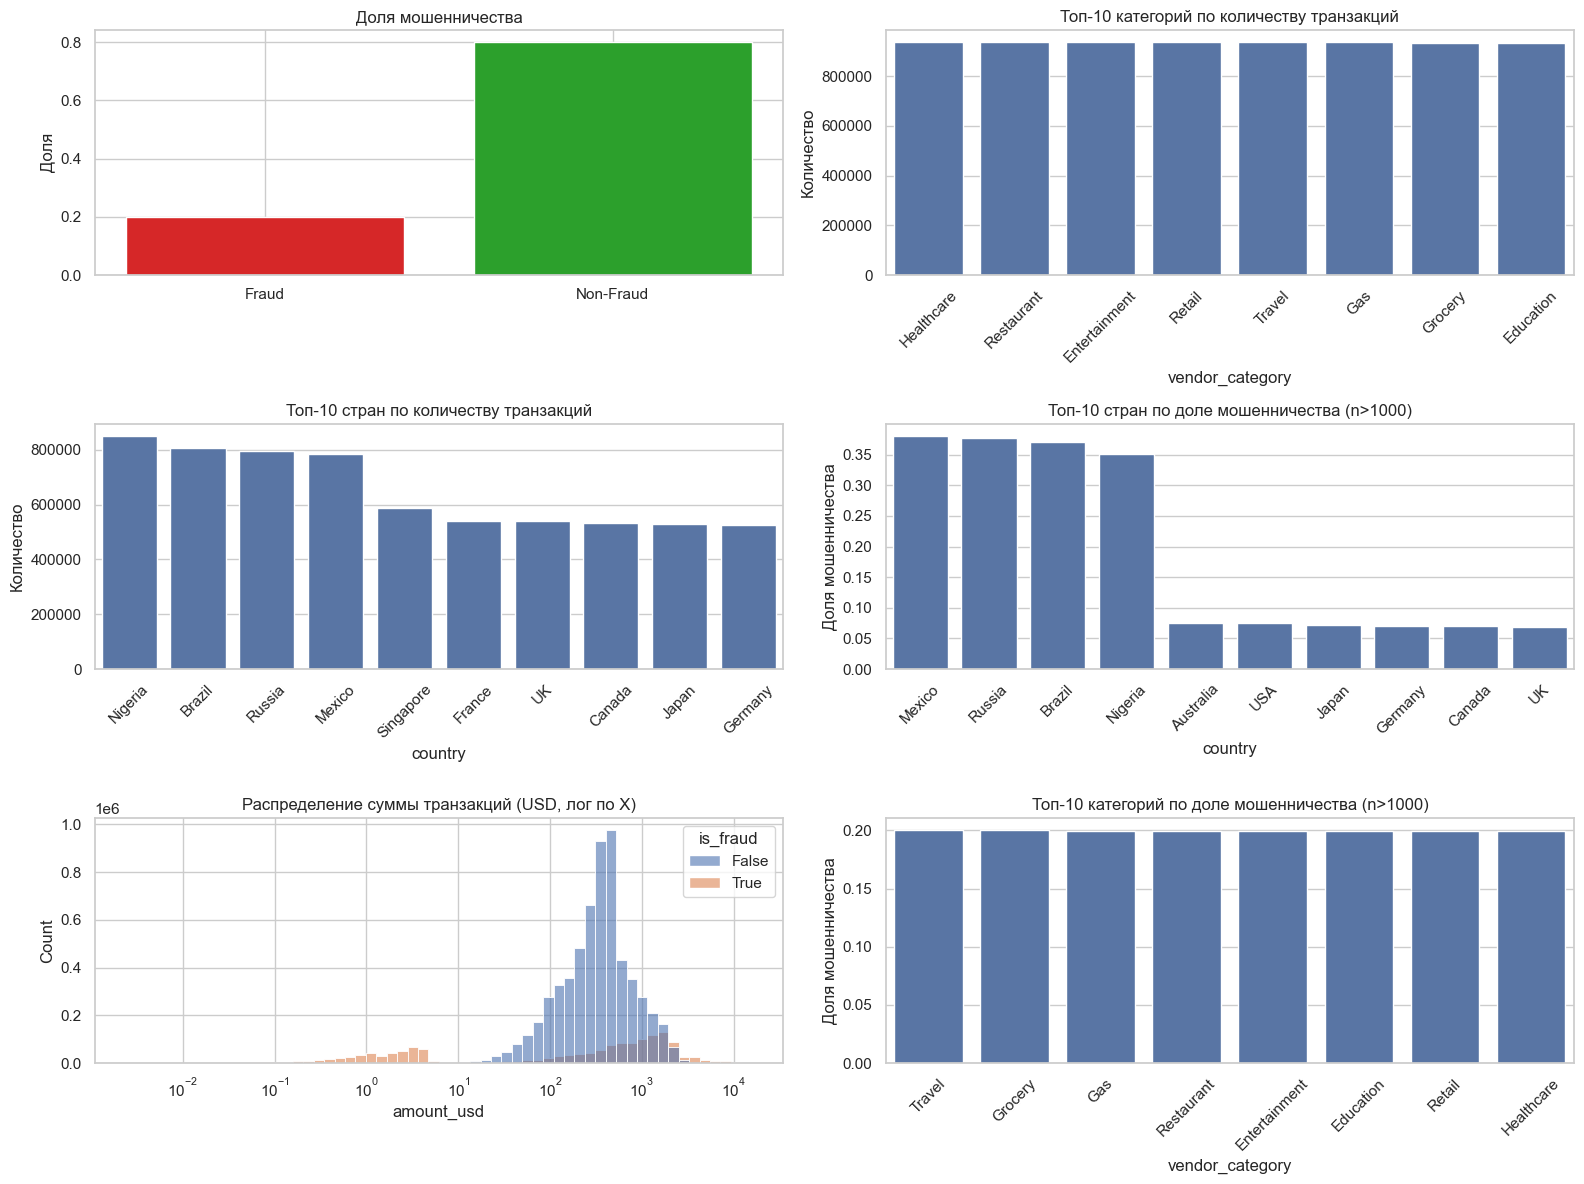

In [9]:
# --- –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∞–≥—Ä–µ–≥–∞—Ç–æ–≤ ---
top_categories = df['vendor_category'].value_counts().head(10)

top_countries_count = df['country'].value_counts().head(10)

country_stats = (
    df.groupby('country')['is_fraud']
      .agg(['mean', 'count'])
      .rename(columns={'mean':'fraud_rate','count':'n'})
)
country_stats_filt = (
    country_stats[country_stats['n'] > 1000]
    .sort_values('fraud_rate', ascending=False)
    .head(10)
)

cat_stats = (
    df.groupby('vendor_category')['is_fraud']
      .agg(['mean','count'])
      .rename(columns={'mean':'fraud_rate','count':'n'})
)
cat_stats_filt = (
    cat_stats[cat_stats['n'] > 1000]
    .sort_values('fraud_rate', ascending=False)
    .head(10)
)


hist_df = df

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

# –î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞
ax = axes[0,0]
ax.bar(['Fraud','Non-Fraud'], [fraud_share, 1 - fraud_share], color=['#d62728','#2ca02c'])
ax.set_title("–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞")
ax.set_ylabel("–î–æ–ª—è")

# –¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
ax = axes[0,1]
sns.barplot(x=top_categories.index, y=top_categories.values, ax=ax)
ax.set_title("–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
ax.set_ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
ax.set_xlabel("vendor_category")
ax.tick_params(axis='x', rotation=45)

# –¢–æ–ø-10 —Å—Ç—Ä–∞–Ω –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
ax = axes[1,0]
sns.barplot(x=top_countries_count.index, y=top_countries_count.values, ax=ax)
ax.set_title("–¢–æ–ø-10 —Å—Ç—Ä–∞–Ω –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
ax.set_ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
ax.set_xlabel("country")
ax.tick_params(axis='x', rotation=45)

# –¢–æ–ø-10 —Å—Ç—Ä–∞–Ω –ø–æ –¥–æ–ª–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞ (min 1000 —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π)
ax = axes[1,1]
sns.barplot(x=country_stats_filt.index, y=country_stats_filt['fraud_rate'], ax=ax)
ax.set_title("–¢–æ–ø-10 —Å—Ç—Ä–∞–Ω –ø–æ –¥–æ–ª–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞ (n>1000)")
ax.set_ylabel("–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞")
ax.set_xlabel("country")
ax.tick_params(axis='x', rotation=45)

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É–º–º—ã —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –≤ USD (–ª–æ–≥-—à–∫–∞–ª–∞ –ø–æ X)
ax = axes[2,0]
sns.histplot(
    data=hist_df,
    x='amount_usd',
    hue='is_fraud',
    bins=60,
    log_scale=(True, False),
    alpha=0.6,
    ax=ax
)
ax.set_title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É–º–º—ã —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π (USD, –ª–æ–≥ –ø–æ X)")
ax.set_xlabel("amount_usd")

# –¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –¥–æ–ª–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞ (min 1000 —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π)
ax = axes[2,1]
sns.barplot(x=cat_stats_filt.index, y=cat_stats_filt['fraud_rate'], ax=ax)
ax.set_title("–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –¥–æ–ª–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞ (n>1000)")
ax.set_ylabel("–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞")
ax.set_xlabel("vendor_category")
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## –í—ã–≤–æ–¥—ã –ø–æ —Ç–µ–∫—É—â–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º

### 1. –û–±—â–∞—è –¥–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞
- **~20%** —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ–º–µ—á–µ–Ω—ã –∫–∞–∫ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏–µ.  
- –≠—Ç–æ –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å, —á—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –ª–∏–±–æ –æ –≤—ã—Å–æ–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –º–æ—à–µ–Ω–Ω–∏–∫–æ–≤, –ª–∏–±–æ –æ —Ç–∞–∫–æ–º –¥–∏–∑–∞–π–Ω–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ :)

---

### 2. –¢–æ–ø –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
- –õ–∏–¥–∏—Ä—É—é—Ç: **Healthcare**, **Restaurant**, **Entertainment**, **Retail**, **Travel** —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –∫–æ–ª-–≤–æ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π, –¥–∞–Ω–Ω—ã–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π

---

### 3. –¢–æ–ø —Å—Ç—Ä–∞–Ω –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
- **Nigeria**, **Brazil**, **Russia**, **Mexico** ‚Äî –ª–∏–¥–µ—Ä—ã –ø–æ —á–∏—Å–ª—É –æ–ø–µ—Ä–∞—Ü–∏–π.
- –í —Ç–æ–ø —Ç–∞–∫–∂–µ –≤—Ö–æ–¥—è—Ç —Å—Ç—Ä–∞–Ω—ã: **UK**, **Canada**, **Japan**, **Germany**.

---

### 4. –¢–æ–ø —Å—Ç—Ä–∞–Ω –ø–æ –¥–æ–ª–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ –¥–æ–ª–∏:
  - **Mexico**, **Russia**, **Brazil**, **Nigeria** 

---

### 5. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É–º–º—ã —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
- –û—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –æ–ø–µ—Ä–∞—Ü–∏–π: **10‚Äì10 000 USD**.
- –£ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö –æ–ø–µ—Ä–∞—Ü–∏–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–æ–ª–µ–µ **–ø–ª–æ—Å–∫–æ–µ** –∏ —Å **–±–æ–ª—å—à–∏–º–∏ —Ö–≤–æ—Å—Ç–∞–º–∏**.
- –ü—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Ö–≤–æ—Å—Ç –∏–∑ **–æ—á–µ–Ω—å –∫—Ä—É–ø–Ω—ã—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π**.

---

### 6. –¢–æ–ø –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –¥–æ–ª–µ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞
- –£ –∫–∞—Ç–µ–≥–æ—Ä–∏–π-–ª–∏–¥–µ—Ä–æ–≤ –ø–æ –∫–æ–ª-–≤—É –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –æ–¥–∏–Ω–∞–∫–æ–≤–∞—è –¥–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π, –¥–∞–Ω–Ω—ã–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π

## –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

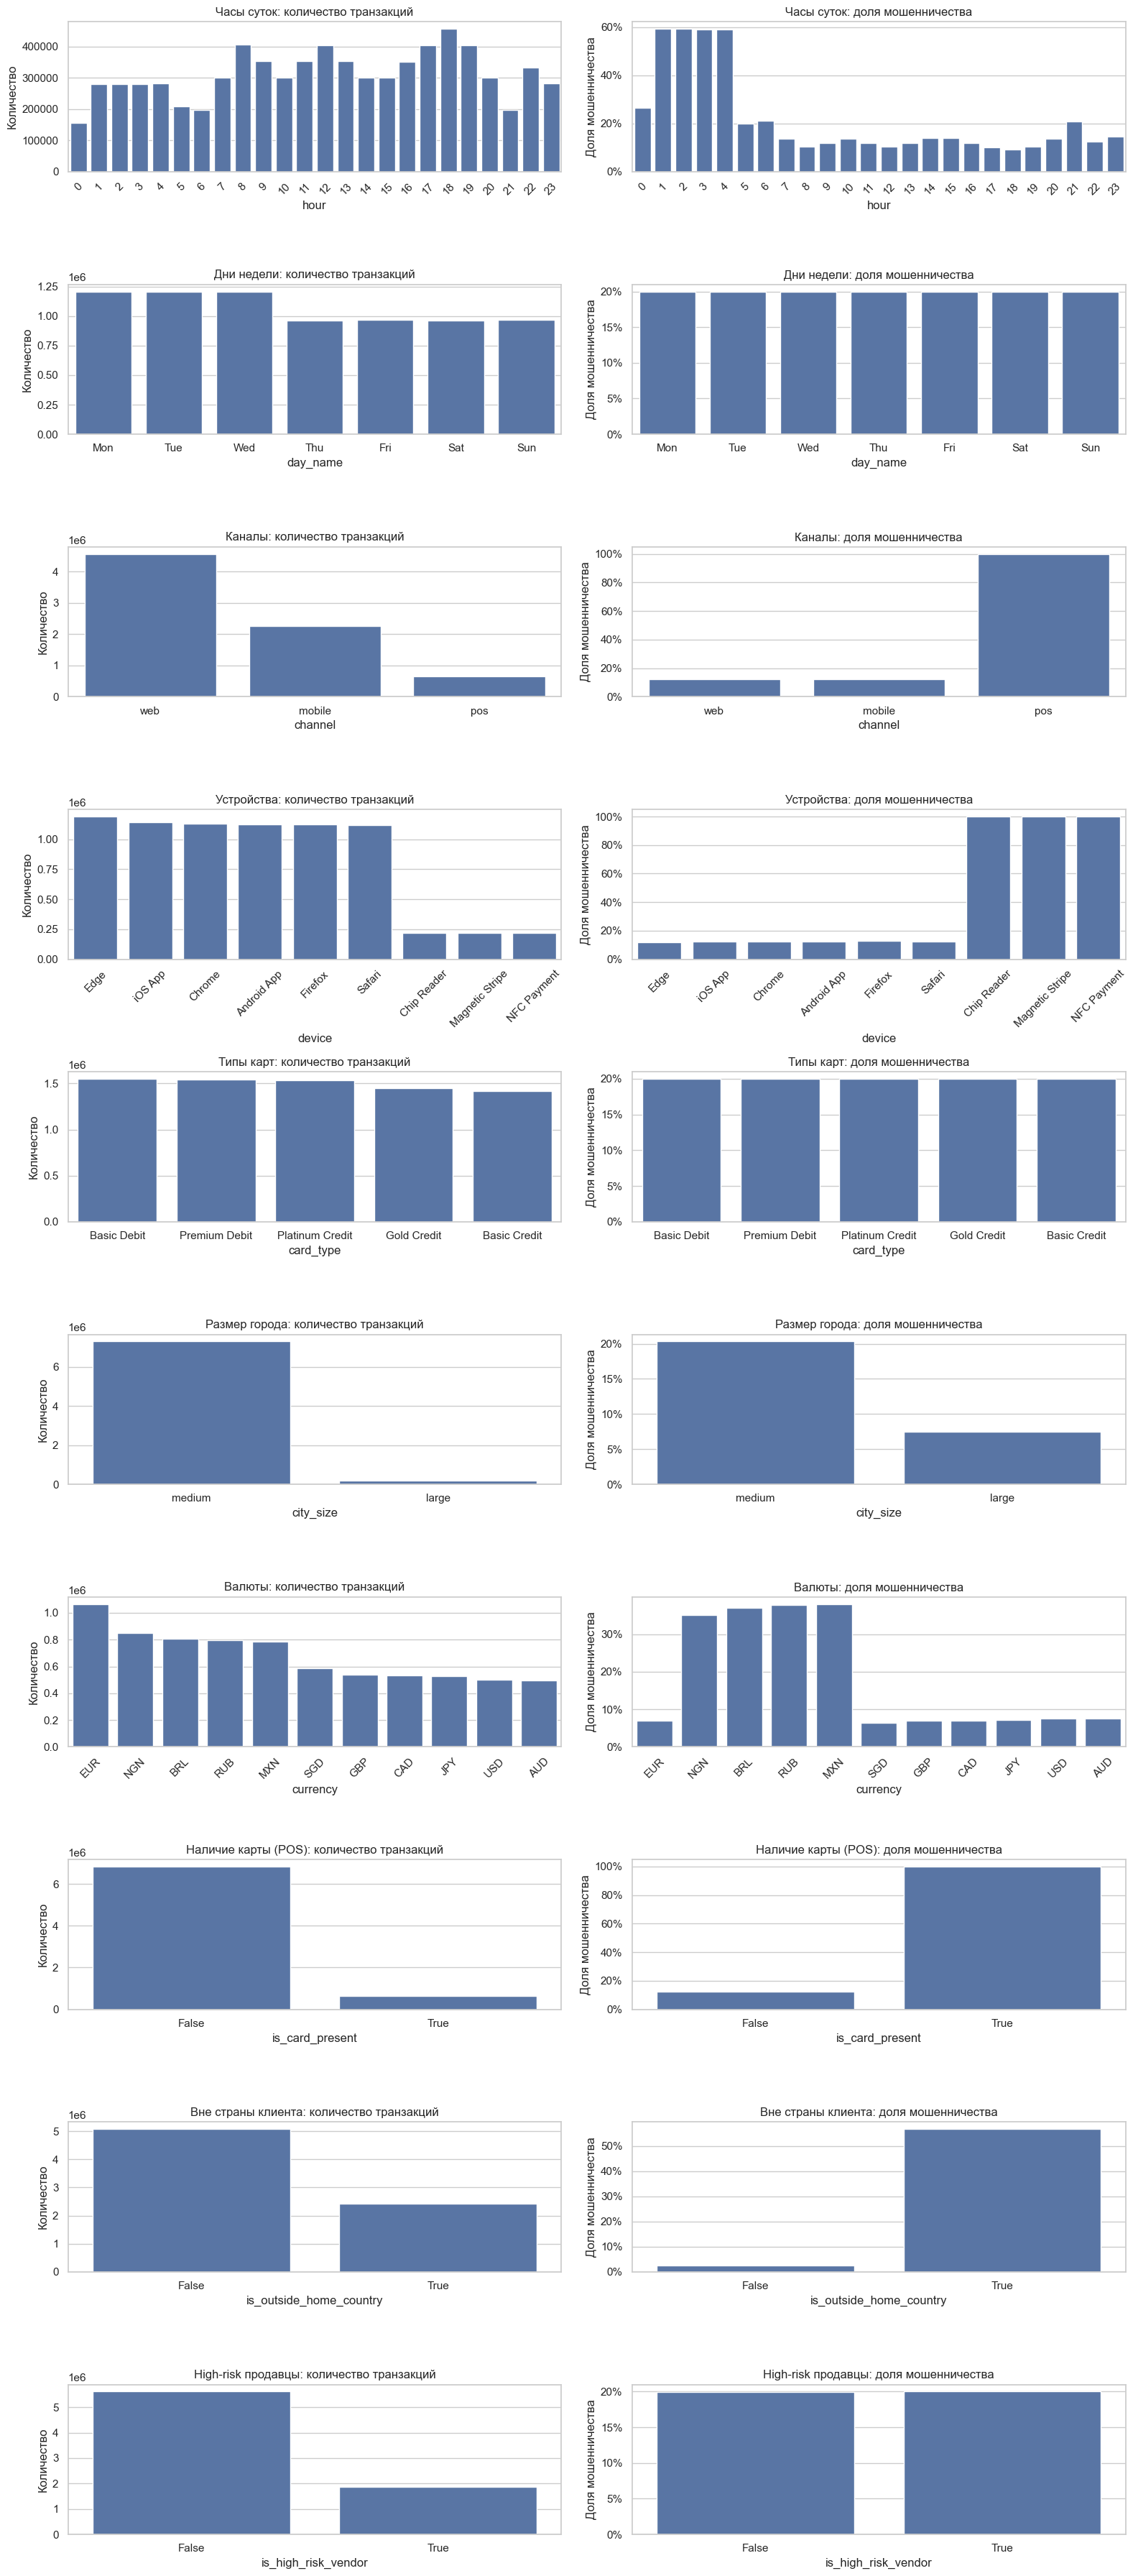

In [10]:
from matplotlib.ticker import FuncFormatter

# –∏–∑–≤–ª–µ–∫–∞–µ–º —á–∞—Å/–¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Å—Ä–µ–∑–æ–≤
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Mon
days_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_name'] = df['day_of_week'].map(days_map)


features = [
    ("hour", "–ß–∞—Å—ã —Å—É—Ç–æ–∫"),
    ("day_name", "–î–Ω–∏ –Ω–µ–¥–µ–ª–∏"),
    ("channel", "–ö–∞–Ω–∞–ª—ã"),
    ("device", "–£—Å—Ç—Ä–æ–π—Å—Ç–≤–∞"),
    ("card_type", "–¢–∏–ø—ã –∫–∞—Ä—Ç"),
    ("city_size", "–†–∞–∑–º–µ—Ä –≥–æ—Ä–æ–¥–∞"),
    ("currency", "–í–∞–ª—é—Ç—ã"),
    ("is_card_present", "–ù–∞–ª–∏—á–∏–µ –∫–∞—Ä—Ç—ã (POS)"),
    ("is_outside_home_country", "–í–Ω–µ —Å—Ç—Ä–∞–Ω—ã –∫–ª–∏–µ–Ω—Ç–∞"),
    ("is_high_risk_vendor", "High-risk –ø—Ä–æ–¥–∞–≤—Ü—ã"),
]

TOP_K = None  

sns.set_theme(style="whitegrid")
n_rows = len(features)
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 3.6*n_rows))

def pct_fmt(x, _):
    return f"{x*100:.0f}%"

for r, (col, title) in enumerate(features):
    # –∞–≥—Ä–µ–≥–∞—Ç—ã: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏ –¥–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞
    stats = df.groupby(col)['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'n', 'mean':'rate'})
    # —É–¥–æ–±–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–π:
    if col == 'hour':
        stats = stats.sort_index()
    elif col == 'day_name':
        order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
        stats = stats.reindex(order)
    else:
        stats = stats.sort_values('n', ascending=False)
    if TOP_K is not None and len(stats) > TOP_K:
        stats = stats.head(TOP_K)

    # –ª–µ–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
    ax_left = axes[r, 0]
    sns.barplot(x=stats.index.astype(str), y=stats['n'], ax=ax_left)
    ax_left.set_title(f"{title}: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
    ax_left.set_xlabel(col)
    ax_left.set_ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
    if stats.shape[0] > 8:
        ax_left.tick_params(axis='x', rotation=45)

    # –ø—Ä–∞–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: –¥–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞
    ax_right = axes[r, 1]
    sns.barplot(x=stats.index.astype(str), y=stats['rate'], ax=ax_right)
    ax_right.set_title(f"{title}: –¥–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞")
    ax_right.set_xlabel(col)
    ax_right.set_ylabel("–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞")
    ax_right.yaxis.set_major_formatter(FuncFormatter(pct_fmt))
    if stats.shape[0] > 8:
        ax_right.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## –í—ã–≤–æ–¥—ã –ø–æ –≤—Ä–µ–º–µ–Ω–Ω—ã–º –∏ –ø–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏–º –ø–∞—Ç—Ç–µ—Ä–Ω–∞–º

### 1. –í—Ä–µ–º—è —Å—É—Ç–æ–∫
- **–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å** —Ä–∞—Å—Ç—ë—Ç –∫ –≤–µ—á–µ—Ä—É; –ø–∏–∫ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π ‚âà **17‚Äì19** —á–∞—Å–æ–≤.
- **–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞** —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∞ –Ω–æ—á—å—é: **‚âà 00‚Äì04** ‚Äî –¥–æ ~**60%**, –¥–∞–ª–µ–µ –ø–∞–¥–∞–µ—Ç –∏ –¥–Ω—ë–º –¥–µ—Ä–∂–∏—Ç—Å—è –Ω–∞ —É—Ä–æ–≤–Ω–µ **~10‚Äì15%** —Å –Ω–µ–±–æ–ª—å—à–∏–º–∏ –≤–µ—á–µ—Ä–Ω–∏–º–∏ –≤—Å–ø–ª–µ—Å–∫–∞–º–∏.
- **–°–ª–µ–¥—É–µ—Ç:** —É–∂–µ—Å—Ç–æ—á–∞—Ç—å –ø—Ä–∞–≤–∏–ª–∞/—Å–∫–æ—Ä–∏–Ω–≥ –≤ –Ω–æ—á–Ω—ã–µ —á–∞—Å—ã; –¥–ª—è high-risk –∫–∞—Ç–µ–≥–æ—Ä–∏–π ‚Äî –ø–æ–≤—ã—à–∞—Ç—å —Ñ—Ä–æ–¥-—Å–∫–æ—Ä.

---

### 2. –î–Ω–∏ –Ω–µ–¥–µ–ª–∏
- **–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞ –ø–æ—á—Ç–∏ —Å—Ç–∞–±–∏–ª—å–Ω–∞** –ø–æ –¥–Ω—è–º (**~20%**), –Ω–æ –≤ –ø–Ω-—Å—Ä –±–æ–ª—å—à–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π

---

### 3. –ö–∞–Ω–∞–ª (web / mobile / POS)
- –ü–æ –æ–±—ä—ë–º—É –ª–∏–¥–∏—Ä—É–µ—Ç **web**, –∑–∞—Ç–µ–º **mobile**, **POS** ‚Äî –º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–æ–ª—è –æ–ø–µ—Ä–∞—Ü–∏–π.
- **–§—Ä–æ–¥-—Ä–µ–π—Ç: POS ~ ~100%**, web/mobile ‚Äî **~10‚Äì15%**.
- POS - –ø–ª–æ—Ö–æ

---

### 4. –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ
- –ë—Ä–∞—É–∑–µ—Ä—ã/–ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è (**Edge, iOS App, Chrome, Android App, Firefox, Safari**) ‚Äî —Ñ—Ä–æ–¥-—Ä–µ–π—Ç **~10‚Äì15%**.
- POS-—É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ (**Chip Reader, Magnetic Stripe, NFC Payment**) ‚Äî **‚âà100%** —Ñ—Ä–æ–¥–∞.
- POS - –ø–ª–æ—Ö–æ
---

### 5. –¢–∏–ø –∫–∞—Ä—Ç—ã
- –û–±—ä—ë–º—ã –ø–æ —Ç–∏–ø–∞–º –∫–∞—Ä—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ.
- **–î–æ–ª–∏ —Ñ—Ä–æ–¥–∞ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã**

---

### 6. –†–∞–∑–º–µ—Ä –≥–æ—Ä–æ–¥–∞
- –ü–æ—á—Ç–∏ –≤—Å–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ –∏–¥—É—Ç –∏–∑ **medium**-cities; **large** ‚Äî –¥–æ–ª—è –º–∞–ª–∞.
- –§—Ä–æ–¥-—Ä–µ–π—Ç –≤—ã—à–µ –≤ **medium** , –Ω–æ –¥–ª—è large **–º–∞–ª–∞—è –≤—ã–±–æ—Ä–∫–∞**.

---

### 7. –í–∞–ª—é—Ç–∞
- –ù–∞–∏–±–æ–ª—å—à–∏–µ –æ–±—ä—ë–º—ã: **EUR, MXN, BRL, RUB** –∏ –¥—Ä.
- –°–∞–º—ã–µ –≤—ã—Å–æ–∫–∏–µ —Ñ—Ä–æ–¥-—Ä–µ–π—Ç—ã —É **MXN, BRL, RUB, NGN** (‚âà**30%+**); —É **EUR/USD/JPY/GBP/SGD/AUD** ‚Äî –∑–∞–º–µ—Ç–Ω–æ –Ω–∏–∂–µ.
- –°–æ–æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Å–æ —Å—Ç—Ä–∞–Ω–∞–º–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–∞–º–∞—è –≤—ã—Å–æ–∫–∞—è –¥–æ–ª—è —Ñ—Ä–æ–¥–∞, –Ω–æ —Ç—É—Ç —Ö–æ—Ä–æ—à–æ —Å–æ—á–µ—Ç–∞—Ç—å —Å —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è–º–∏ –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ —Å—Ç—Ä–∞–Ω—ã.

---

### 8. –ù–∞–ª–∏—á–∏–µ –∫–∞—Ä—Ç—ã (is_card_present)
- –ü–æ –æ–±—ä—ë–º—É –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç **is_card_present=False**.
- **–ï—Å–ª–∏ –∫–∞—Ä—Ç–∞ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç ‚Äî —Ñ—Ä–æ–¥ ‚âà ~100%**; –µ—Å–ª–∏ –Ω–µ—Ç ‚Äî **~10%**.
- –ö—Ä–∞–π–Ω–µ –≤–µ—Ä–æ—è—Ç–Ω–∞ **—É—Ç–µ—á–∫–∞ —Ç–∞—Ä–≥–µ—Ç–∞** –∏–ª–∏ –ø—Ä–∞–≤–∏–ª–æ —Ä–∞–∑–º–µ—Ç–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤—Å–µ POS-–∫–µ–π—Å—ã —Ä–∞–∑–º–µ—á–µ–Ω—ã –∫–∞–∫ —Ñ—Ä–æ–¥). –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω—ã—Ö.
- –õ–æ–≥–∏—á–µ—Å–∫–∏ –Ω–µ —Å–∞–º—ã–π –ø–æ–Ω—è—Ç–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫

---

### 9. –í–Ω–µ —Å—Ç—Ä–∞–Ω—ã –∫–ª–∏–µ–Ω—Ç–∞ (is_outside_home_country)
- –¢—Ä–∞–Ω–∑–∞–∫—Ü–∏–π ¬´–≤–Ω–µ —Å—Ç—Ä–∞–Ω—ã¬ª –º–µ–Ω—å—à–µ –ø–æ –æ–±—ä—ë–º—É, –Ω–æ **—Ñ—Ä–æ–¥-—Ä–µ–π—Ç –≤—ã—Å–æ–∫–∏–π (~57%+)**

---

### 10. High-risk –ø—Ä–æ–¥–∞–≤—Ü—ã (is_high_risk_vendor)
- –û–±—ä—ë–º —É **False** –±–æ–ª—å—à–µ, —á–µ–º —É **True**.
- **–§—Ä–æ–¥-—Ä–µ–π—Ç** —É **True** –∑–∞–º–µ—Ç–Ω–æ –≤—ã—à–µ (–≤ —Ä–∞–∑—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ False), –∑–Ω–∞—á–∏—Ç –Ω–µ –∑—Ä—è —Ç–∞–∫–∏–µ –≤–µ–Ω–¥–æ—Ä—ã –æ—Ç–º–µ—á–µ–Ω—ã —Ä–∏—Å–∫–æ–≤—ã–º–∏.



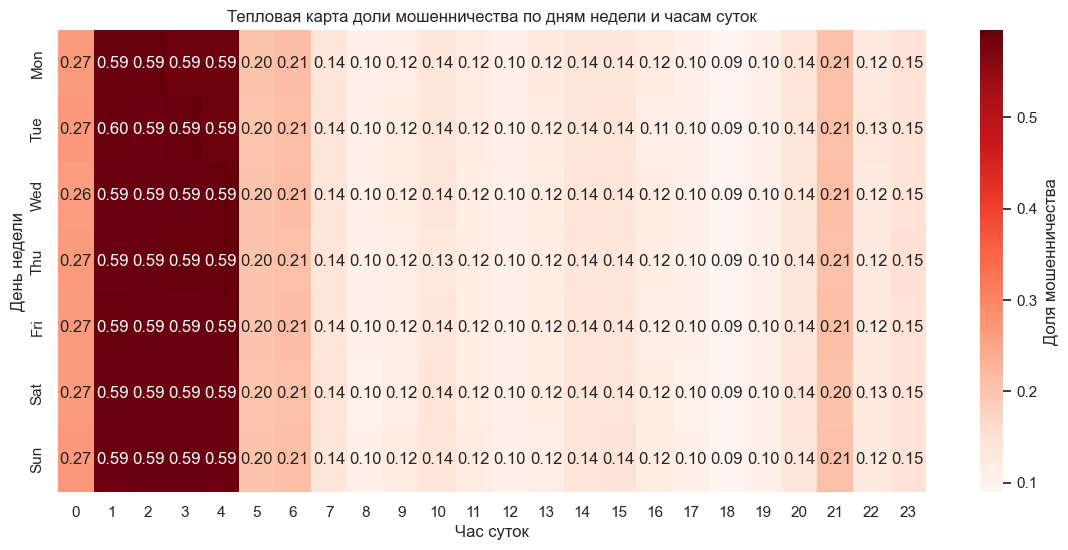

In [11]:
# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –¥–Ω—é –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å—É
heatmap_data = (
    df.groupby(['day_of_week', 'hour'])['is_fraud']
      .mean()
      .reset_index()
      .pivot(index='day_of_week', columns='hour', values='is_fraud')
)

heatmap_data.index = heatmap_data.index.map(days_map)

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    annot=True,
    fmt=".2f",
    cbar_kws={'label': '–î–æ–ª—è –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞'}
)
plt.title("–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –¥–æ–ª–∏ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–∞ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏ –∏ —á–∞—Å–∞–º —Å—É—Ç–æ–∫")
plt.xlabel("–ß–∞—Å —Å—É—Ç–æ–∫")
plt.ylabel("–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏")
plt.show()


In [12]:
df

transaction_id customer_id       card_number  \
0          TX_a0ad2a2a  CUST_72886  6646734767813109   
1          TX_3599c101  CUST_70474   376800864692727   
2          TX_a9461c6d  CUST_10715  5251909460951913   
3          TX_7be21fc4  CUST_16193   376079286931183   
4          TX_150f490b  CUST_87572  6172948052178810   
...                ...         ...               ...   
7483761    TX_58a762fa  CUST_11344   377055034743699   
7483762    TX_dabcf671  CUST_38961   373625915641065   
7483763    TX_ab567eb4  CUST_75576  6702342842796660   
7483764    TX_5ae61846  CUST_82508   374615717295581   
7483765    TX_54fccca9  CUST_20139   373017396639208   

                         timestamp vendor_category vendor_type  \
0       2024-09-30 00:00:01.034820      Restaurant   fast_food   
1       2024-09-30 00:00:01.764464   Entertainment      gaming   
2       2024-09-30 00:00:02.273762         Grocery    physical   
3       2024-09-30 00:00:02.297466             Gas       major   
4       2024-09-30 00:00:02.544063      Healthcare     medical   
...                            ...             ...         ...   
7483761 2024-10-30 23:59:58.926575          Retail      online   
7483762 2024-10-30 23:59:58.950801         Grocery    physical   
7483763 2024-10-30 23:59:58.972155         Grocery    physical   
7483764 2024-10-30 23:59:58.996608          Retail      online   
7483765 2024-10-30 23:59:59.101885         Grocery      online   

                  vendor     amount currency    country  ...  \
0              Taco Bell     294.87      GBP         UK  ...   
1                  Steam    3368.97      BRL     Brazil  ...   
2            Whole Foods  102582.38      JPY      Japan  ...   
3                  Exxon     630.60      AUD  Australia  ...   
4         Medical Center  724949.27      NGN    Nigeria  ...   
...                  ...        ...      ...        ...  ...   
7483761       AliExpress     887.32      SGD  Singapore  ...   
7483762           Kroger     356.06      EUR     France  ...   
7483763           Kroger     391.96      SGD  Singapore  ...   
7483764             eBay     601.71      USD        USA  ...   
7483765  Walmart Grocery   40668.06      JPY      Japan  ...   

        last_hour_unique_merchants last_hour_unique_countries  \
0                              105                         12   
1                              100                         12   
2                               97                         12   
3                              105                         12   
4                               88                         12   
...                            ...                        ...   
7483761                          1                          1   
7483762                          0                          0   
7483763                          0                          0   
7483764                          2                          1   
7483765                          0                          0   

        last_hour_max_single_amount         rate  amount_usd  \
0                      1.925481e+06     0.747153  394.658011   
1                      5.149117e+06     5.434649  619.905757   
2                      1.852242e+06   142.573268  719.506409   
3                      2.055798e+06     1.443654  436.808287   
4                      1.157231e+06  1668.736400  434.430069   
...                             ...          ...         ...   
7483761                8.873226e+02     1.323643  670.362079   
7483762                3.560645e+02     0.923864  385.402905   
7483763                3.919607e+02     1.323643  296.122166   
7483764                6.017100e+02     1.000000  601.710000   
7483765                4.066806e+04   153.160003  265.526634   

        last_hour_total_amount_usd last_hour_max_single_amount_usd hour  \
0                     4.483492e+07                    2.577089e+06    0   
1                     3.701207e+06                    9.474609e+05    0  

## –î–æ–±–∞–≤–∏–º —Ñ–∏—á–∏

In [13]:

# === –í—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ===
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend_day'] = df['day_of_week'].isin([5,6]).astype(int) # –≤–º–µ—Å—Ç–æ is_weekend, —Ç–∫ —ç—Ç–æ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—É—é —Ñ–∏—á—É –ª—É—á—à–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ —á–∏—Å–ª–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
df['is_night'] = df['hour'].between(0, 5).astype(int)


# === –ü–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ===
# –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –∫ –ø–æ–≤–µ–¥–µ–Ω–∏—é –∫–ª–∏–µ–Ω—Ç–∞
client_median_amount = df.groupby('customer_id')['amount_usd'].transform('median')
df['rel_amount_to_client_median'] = df['amount_usd'] / (client_median_amount + 1e-5)

df['rel_amount_to_last_hour_max'] = df['amount_usd'] / (df['last_hour_max_single_amount_usd'] + 1e-5)
df['rel_amount_to_last_hour_total'] = df['amount_usd'] / (df['last_hour_total_amount_usd'] + 1e-5)

# === –ì–µ–æ/–≤–∞–ª—é—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ ===
high_risk_currencies = ['MXN', 'BRL', 'RUB', 'NGN']
df['is_high_risk_currency'] = df['currency'].isin(high_risk_currencies).astype(int)

# —Å—Ç—Ä–∞–Ω–∞ high-risk –∏–∑ EDA
high_risk_countries = ['Mexico', 'Russia', 'Brazil', 'Nigeria']
df['is_high_risk_country'] = df['country'].isin(high_risk_countries).astype(int)



In [14]:
df

transaction_id customer_id       card_number  \
0          TX_a0ad2a2a  CUST_72886  6646734767813109   
1          TX_3599c101  CUST_70474   376800864692727   
2          TX_a9461c6d  CUST_10715  5251909460951913   
3          TX_7be21fc4  CUST_16193   376079286931183   
4          TX_150f490b  CUST_87572  6172948052178810   
...                ...         ...               ...   
7483761    TX_58a762fa  CUST_11344   377055034743699   
7483762    TX_dabcf671  CUST_38961   373625915641065   
7483763    TX_ab567eb4  CUST_75576  6702342842796660   
7483764    TX_5ae61846  CUST_82508   374615717295581   
7483765    TX_54fccca9  CUST_20139   373017396639208   

                         timestamp vendor_category vendor_type  \
0       2024-09-30 00:00:01.034820      Restaurant   fast_food   
1       2024-09-30 00:00:01.764464   Entertainment      gaming   
2       2024-09-30 00:00:02.273762         Grocery    physical   
3       2024-09-30 00:00:02.297466             Gas       major   
4       2024-09-30 00:00:02.544063      Healthcare     medical   
...                            ...             ...         ...   
7483761 2024-10-30 23:59:58.926575          Retail      online   
7483762 2024-10-30 23:59:58.950801         Grocery    physical   
7483763 2024-10-30 23:59:58.972155         Grocery    physical   
7483764 2024-10-30 23:59:58.996608          Retail      online   
7483765 2024-10-30 23:59:59.101885         Grocery      online   

                  vendor     amount currency    country  ... hour day_of_week  \
0              Taco Bell     294.87      GBP         UK  ...    0           0   
1                  Steam    3368.97      BRL     Brazil  ...    0           0   
2            Whole Foods  102582.38      JPY      Japan  ...    0           0   
3                  Exxon     630.60      AUD  Australia  ...    0           0   
4         Medical Center  724949.27      NGN    Nigeria  ...    0           0   
...                  ...        ...      ...        ...  ...  ...         ...   
7483761       AliExpress     887.32      SGD  Singapore  ...   23           2   
7483762           Kroger     356.06      EUR     France  ...   23           2   
7483763           Kroger     391.96      SGD  Singapore  ...   23           2   
7483764             eBay     601.71      USD        USA  ...   23           2   
7483765  Walmart Grocery   40668.06      JPY      Japan  ...   23           2   

        day_name  is_weekend_day is_night rel_amount_to_client_median  \
0            Mon               0        1                    0.453112   
1            Mon               0        1                    0.505310   
2            Mon               0        1                    0.981861   
3            Mon               0        1                    1.123669   
4            Mon               0        1                    1.945364   
...          ...             ...      ...                         ...   
7483761      Wed               0        0                    1.458745   
7483762      Wed               0        0                    0.675919   
7483763      Wed               0        0                    0.807837   
7483764      Wed               0        0                    2.726371   
7483765      Wed               0        0                    0.926445   

        rel_amount_to_last_hour_max rel_amount_to_last_hour_total  \
0                          0.000153                      0.000009   
1                          0.000654                      0.000167   
2                          0.055383                      0.002619   
3                          0.000307                      0.000029   
4                          0.626452                      0.150167   
...                             ...                           ...   
7483761                    0.999997                      0.583085   
7483762                    0.999987                      0.999987   
7483763                    0.999998                      0.999998   
74

## –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —É—Ç–µ—á–∫—É —Ç–∞—Ä–≥–µ—Ç–∞

In [15]:
def check_leakage(df, col, target='is_fraud', min_count=100):
    stats = df.groupby(col)[target].agg(['mean', 'count']).sort_values('mean', ascending=False)
    stats['mean_pct'] = stats['mean'] * 100
    suspicious = stats[(stats['count'] > min_count) & ((stats['mean'] < 0.05) | (stats['mean'] > 0.95))]
    return stats, suspicious

categorical_cols = [
    'channel', 'device', 'card_type', 'city_size', 'currency', 
    'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor'
]

for col in categorical_cols:
    stats, suspicious = check_leakage(df, col)
    print(f"\n=== {col} ===")
    print(stats)
    if not suspicious.empty:
        print("–í–æ–∑–º–æ–∂–Ω–∞—è —É—Ç–µ—á–∫–∞:")
        print(suspicious)



=== channel ===
             mean    count    mean_pct
channel                               
pos      1.000000   651047  100.000000
mobile   0.123878  2269578   12.387765
web      0.123275  4563141   12.327517
–í–æ–∑–º–æ–∂–Ω–∞—è —É—Ç–µ—á–∫–∞:
         mean   count  mean_pct
channel                        
pos       1.0  651047     100.0

=== device ===
                     mean    count    mean_pct
device                                        
Chip Reader      1.000000   217324  100.000000
Magnetic Stripe  1.000000   217204  100.000000
NFC Payment      1.000000   216519  100.000000
Firefox          0.126831  1120952   12.683059
Safari           0.126204  1120245   12.620364
Android App      0.125070  1126117   12.507049
Chrome           0.123710  1132384   12.370980
iOS App          0.122703  1143461   12.270292
Edge             0.116753  1189560   11.675325
–í–æ–∑–º–æ–∂–Ω–∞—è —É—Ç–µ—á–∫–∞:
                 mean   count  mean_pct
device                                 
Chip Reader  

C—É–¥—è –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º, —É –Ω–∞—Å –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —è–≤–Ω–æ–π —É—Ç–µ—á–∫–æ–π —Ç–∞—Ä–≥–µ—Ç–∞:

channel: pos = 100% fraud 

device: Chip Reader, Magnetic Stripe, NFC Payment = 100% fraud 

is_card_present: True = 100% fraud 


is_outside_home_country - –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –¥–∏—Å–ø—Ä–æ–ø–æ—Ä—Ü–∏—è, –Ω–æ —É –º–æ—à–µ–Ω–Ω–∏–∫–æ–≤ –Ω–µ –ø—Ä–∏–Ω—è—Ç–æ —Ä–∞–±–æ—Ç–∞—Ç—å –≤–Ω—É—Ç—Ä–∏ —Å—Ç—Ä–∞–Ω—ã, —Ç–∫ —Ç–∞–∫ –≤—ã—à–µ —à–∞–Ω—Å –±—ã—Å—Ç—Ä–æ —Å—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è —Å –ø—Ä–∞–≤–æ—Å—É–¥–∏–µ–º, —Ç–∞–∫ —á—Ç–æ —Ç—É—Ç –≤—Å–µ –ª–æ–≥–∏—á–Ω–æ.

–û—Å—Ç–∞–ª—å–Ω—ã–µ –ø–æ–ª—è —Å–≤–µ—Ä—Ö—É, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ –æ–Ω–∏ –∫–∞–∂—É—Ç—Å—è –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –ø—Ä–∏–¥–µ—Ç—Å—è –Ω–µ –≤–∫–ª—é—á–∞—Ç—å –≤ –º–æ–¥–µ–ª—å, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–∏ –ø–æ–≤–ª–∏—è—é—Ç –Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å.

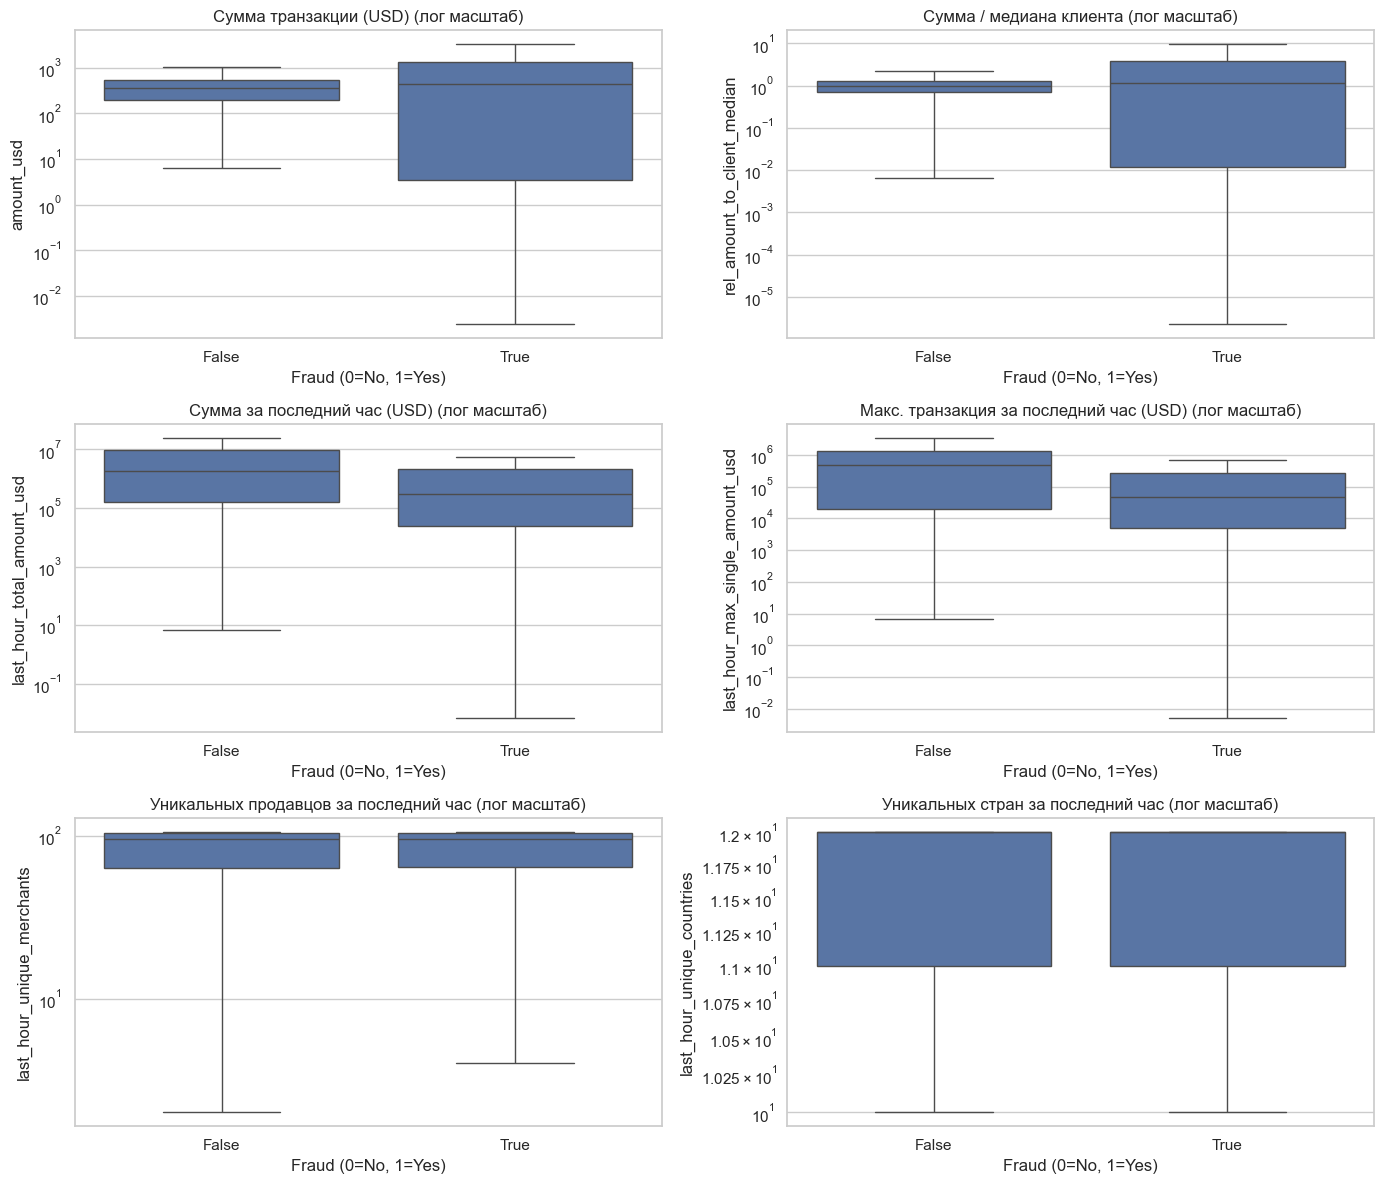

feature        median  fraud_rate_above_median  \
0                       amount_usd  3.592600e+02                 0.213283   
1      rel_amount_to_client_median  1.000000e+00                 0.207964   
2       last_hour_total_amount_usd  1.268625e+06                 0.127791   
3  last_hour_max_single_amount_usd  2.490535e+05                 0.104196   
4       last_hour_unique_merchants  9.500000e+01                 0.201098   
5       last_hour_unique_countries  1.200000e+01                      NaN   

   fraud_rate_below_median  mannwhitney_pval   roc_auc  
0                 0.186173      0.000000e+00  0.511715  
1                 0.191493      0.000000e+00  0.513880  
2                 0.271666      0.000000e+00  0.351612  
3                 0.295260      0.000000e+00  0.336425  
4                 0.198405      1.120554e-49  0.503895  
5                 0.199728      6.407177e-53  0.503371

In [16]:
from scipy.stats import mannwhitneyu
from sklearn.metrics import roc_auc_score


# –ü—Ä–∏–∑–Ω–∞–∫: —Å—É–º–º–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –º–µ–¥–∏–∞–Ω—ã –∫–ª–∏–µ–Ω—Ç–∞
# client_median_amount = df.groupby('customer_id')['amount_usd'].transform('median')
# df['rel_amount_to_client_median'] = df['amount_usd'] / (client_median_amount + 1e-5)

features_to_check = [
    ('amount_usd', '–°—É–º–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (USD)'),
    ('rel_amount_to_client_median', '–°—É–º–º–∞ / –º–µ–¥–∏–∞–Ω–∞ –∫–ª–∏–µ–Ω—Ç–∞'),
    ('last_hour_total_amount_usd', '–°—É–º–º–∞ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å (USD)'),
    ('last_hour_max_single_amount_usd', '–ú–∞–∫—Å. —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å (USD)'),
    ('last_hour_unique_merchants', '–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–æ–¥–∞–≤—Ü–æ–≤ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å'),
    ('last_hour_unique_countries', '–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Ç—Ä–∞–Ω –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å'),
]

results = []

n_cols = 2
n_rows = int(np.ceil(len(features_to_check) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, (col, title) in enumerate(features_to_check):
    # –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç
    fraud_vals = df.loc[df['is_fraud'], col]
    nonfraud_vals = df.loc[~df['is_fraud'], col]
    u_stat, p_val = mannwhitneyu(fraud_vals, nonfraud_vals, alternative='two-sided')
    
    # ROC-AUC 
    auc_val = roc_auc_score(df['is_fraud'], df[col])
    
    # –ë–∏–Ω–∞—Ä–∏–∑–∞—Ü–∏—è –ø–æ –º–µ–¥–∏–∞–Ω–µ
    threshold = df[col].median()
    fraud_rate_above = df[df[col] > threshold]['is_fraud'].mean()
    fraud_rate_below = df[df[col] <= threshold]['is_fraud'].mean()
    
    results.append({
        'feature': col,
        'median': threshold,
        'fraud_rate_above_median': fraud_rate_above,
        'fraud_rate_below_median': fraud_rate_below,
        'mannwhitney_pval': p_val,
        'roc_auc': auc_val
    })
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    sns.boxplot(x='is_fraud', y=col, data=df, showfliers=False, ax=axes[i])
    axes[i].set_yscale('log')
    axes[i].set_title(f"{title} (–ª–æ–≥ –º–∞—Å—à—Ç–∞–±)")
    axes[i].set_xlabel("Fraud (0=No, 1=Yes)")
    axes[i].set_ylabel(col)


for j in range(len(features_to_check), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# –¢–∞–±–ª–∏—Ü–∞ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
results_df = pd.DataFrame(results)
display(results_df)


## –ê–Ω–∞–ª–∏–∑ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∏—Ö —Å–≤—è–∑—å —Å –º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ–º

### 1. **–°—É–º–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (`amount_usd`)**
- –ú–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —É fraud –∏ non-fraud —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π **—Å—Ö–æ–∂–∏**, –Ω–æ —Ä–∞–∑–±—Ä–æ—Å —É –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —à–∏—Ä–µ.

---

### 2. **–û—Ç–Ω–æ—à–µ–Ω–∏–µ —Å—É–º–º—ã —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ –∫ –º–µ–¥–∏–∞–Ω–µ –∫–ª–∏–µ–Ω—Ç–∞ (`rel_amount_to_client_median`)**
- –£ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ fraud-—Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ –∏–º–µ—é—Ç **–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç –∏—Ö –º–µ–¥–∏–∞–Ω–Ω–æ–π —Å—É–º–º—ã**.
- –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–º –Ω–µ–æ–±—ã—á–Ω–æ–≥–æ –ø–æ–≤–µ–¥–µ–Ω–∏—è.

---

### 3. **–û–±—â–∞—è —Å—É–º–º–∞ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å (`last_hour_total_amount_usd`)**
- Fraud-—Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ —á–∞—Å—Ç–æ —Å–æ–ø—Ä–æ–≤–æ–∂–¥–∞—é—Ç—Å—è **–º–µ–Ω—å—à–∏–º–∏ —Å—É–º–º–∞–º–∏ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å**, —á–µ–º —É –æ–±—ã—á–Ω—ã—Ö.

---

### 4. **–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å (`last_hour_max_single_amount_usd`)**
- –£ fraud —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —á—É—Ç—å –Ω–∏–∂–µ, –Ω–æ —Ä–∞–∑–±—Ä–æ—Å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤—ã—à–µ.

---

### 5. **–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–æ–¥–∞–≤—Ü–æ–≤ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π —á–∞—Å (`last_hour_unique_merchants`)**
- Fraud –Ω–µ —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

---

### –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ç–µ—Å—Ç—ã
- –î–ª—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ p-value < 0.05, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ **—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è** –º–µ–∂–¥—É fraud –∏ non-fraud —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è–º–∏.
- –ù–∞–∏–±–æ–ª–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º–∏ –≤—ã–≥–ª—è–¥—è—Ç:
  - `amount_usd`
  - `rel_amount_to_client_median`
  - `last_hour_total_amount_usd`
  - `last_hour_max_single_amount_usd`


# –ì–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è ML –º–æ–¥–µ–ª–∏


In [17]:
df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'vendor_category', 'vendor_type', 'vendor', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'is_card_present',
       'device', 'channel', 'device_fingerprint', 'ip_address',
       'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend',
       'last_hour_activity', 'is_fraud', 'date', 'last_hour_num_transactions',
       'last_hour_total_amount', 'last_hour_unique_merchants',
       'last_hour_unique_countries', 'last_hour_max_single_amount', 'rate',
       'amount_usd', 'last_hour_total_amount_usd',
       'last_hour_max_single_amount_usd', 'hour', 'day_of_week', 'day_name',
       'is_weekend_day', 'is_night', 'rel_amount_to_client_median',
       'rel_amount_to_last_hour_max', 'rel_amount_to_last_hour_total',
       'is_high_risk_currency', 'is_high_risk_country'],
      dtype='object')

In [18]:
df

transaction_id customer_id       card_number  \
0          TX_a0ad2a2a  CUST_72886  6646734767813109   
1          TX_3599c101  CUST_70474   376800864692727   
2          TX_a9461c6d  CUST_10715  5251909460951913   
3          TX_7be21fc4  CUST_16193   376079286931183   
4          TX_150f490b  CUST_87572  6172948052178810   
...                ...         ...               ...   
7483761    TX_58a762fa  CUST_11344   377055034743699   
7483762    TX_dabcf671  CUST_38961   373625915641065   
7483763    TX_ab567eb4  CUST_75576  6702342842796660   
7483764    TX_5ae61846  CUST_82508   374615717295581   
7483765    TX_54fccca9  CUST_20139   373017396639208   

                         timestamp vendor_category vendor_type  \
0       2024-09-30 00:00:01.034820      Restaurant   fast_food   
1       2024-09-30 00:00:01.764464   Entertainment      gaming   
2       2024-09-30 00:00:02.273762         Grocery    physical   
3       2024-09-30 00:00:02.297466             Gas       major   
4       2024-09-30 00:00:02.544063      Healthcare     medical   
...                            ...             ...         ...   
7483761 2024-10-30 23:59:58.926575          Retail      online   
7483762 2024-10-30 23:59:58.950801         Grocery    physical   
7483763 2024-10-30 23:59:58.972155         Grocery    physical   
7483764 2024-10-30 23:59:58.996608          Retail      online   
7483765 2024-10-30 23:59:59.101885         Grocery      online   

                  vendor     amount currency    country  ... hour day_of_week  \
0              Taco Bell     294.87      GBP         UK  ...    0           0   
1                  Steam    3368.97      BRL     Brazil  ...    0           0   
2            Whole Foods  102582.38      JPY      Japan  ...    0           0   
3                  Exxon     630.60      AUD  Australia  ...    0           0   
4         Medical Center  724949.27      NGN    Nigeria  ...    0           0   
...                  ...        ...      ...        ...  ...  ...         ...   
7483761       AliExpress     887.32      SGD  Singapore  ...   23           2   
7483762           Kroger     356.06      EUR     France  ...   23           2   
7483763           Kroger     391.96      SGD  Singapore  ...   23           2   
7483764             eBay     601.71      USD        USA  ...   23           2   
7483765  Walmart Grocery   40668.06      JPY      Japan  ...   23           2   

        day_name  is_weekend_day is_night rel_amount_to_client_median  \
0            Mon               0        1                    0.453112   
1            Mon               0        1                    0.505310   
2            Mon               0        1                    0.981861   
3            Mon               0        1                    1.123669   
4            Mon               0        1                    1.945364   
...          ...             ...      ...                         ...   
7483761      Wed               0        0                    1.458745   
7483762      Wed               0        0                    0.675919   
7483763      Wed               0        0                    0.807837   
7483764      Wed               0        0                    2.726371   
7483765      Wed               0        0                    0.926445   

        rel_amount_to_last_hour_max rel_amount_to_last_hour_total  \
0                          0.000153                      0.000009   
1                          0.000654                      0.000167   
2                          0.055383                      0.002619   
3                          0.000307                      0.000029   
4                          0.626452                      0.150167   
...                             ...                           ...   
7483761                    0.999997                      0.583085   
7483762                    0.999987                      0.999987   
7483763                    0.999998                      0.999998   
74

In [19]:
df_cleaned = df.copy()

# —á–∏—Å—Ç–∫–∞
leak_cols = ['channel', 'device', 'is_card_present']  # —è–≤–Ω—ã–µ —É—Ç–µ—á–∫–∏
drop_cols = [
    'transaction_id', 'customer_id', 'card_number', 'timestamp',
    'device_fingerprint', 'ip_address',
    'date', 'day_name', 'is_weekend', # —É–∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –≤ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –¥—Ä—É–≥–∏—Ö –ø–æ–ª—è—Ö
    'vendor', 'city',  
    'last_hour_activity',  # –∏—Å—Ö–æ–¥–Ω–∞—è –≤–ª–æ–∂–µ–Ω–Ω–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞
    'amount', 'rate',  # –ø–µ—Ä–≤–∏—á–Ω—ã–µ –ø–æ–ª—è –¥–æ –∫–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏–∏
    'last_hour_total_amount', 'last_hour_max_single_amount'  # –¥–æ –∫–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏–∏ –≤ USD
]
df_cleaned = df_cleaned.drop(columns=[c for c in leak_cols + drop_cols if c in df_cleaned.columns])

In [20]:
df_cleaned

vendor_category vendor_type currency    country city_size  \
0            Restaurant   fast_food      GBP         UK    medium   
1         Entertainment      gaming      BRL     Brazil    medium   
2               Grocery    physical      JPY      Japan    medium   
3                   Gas       major      AUD  Australia    medium   
4            Healthcare     medical      NGN    Nigeria    medium   
...                 ...         ...      ...        ...       ...   
7483761          Retail      online      SGD  Singapore    medium   
7483762         Grocery    physical      EUR     France    medium   
7483763         Grocery    physical      SGD  Singapore    medium   
7483764          Retail      online      USD        USA     large   
7483765         Grocery      online      JPY      Japan    medium   

               card_type  is_outside_home_country  is_high_risk_vendor  \
0        Platinum Credit                    False                False   
1        Platinum Credit                     True                 True   
2        Platinum Credit                    False                False   
3          Premium Debit                    False                False   
4            Basic Debit                     True                False   
...                  ...                      ...                  ...   
7483761    Premium Debit                    False                False   
7483762  Platinum Credit                    False                False   
7483763    Premium Debit                    False                False   
7483764     Basic Credit                    False                False   
7483765      Gold Credit                    False                False   

         is_fraud  last_hour_num_transactions  ...  \
0           False                        1197  ...   
1            True                         509  ...   
2           False                         332  ...   
3           False                         764  ...   
4            True                         218  ...   
...           ...                         ...  ...   
7483761     False                           1  ...   
7483762     False                           0  ...   
7483763     False                           0  ...   
7483764     False                           2  ...   
7483765     False                           0  ...   

         last_hour_max_single_amount_usd  hour  day_of_week  is_weekend_day  \
0                           2.577089e+06     0            0               0   
1                           9.474609e+05     0            0               0   
2                           1.299151e+04     0            0               0   
3                           1.424024e+06     0            0               0   
4                           6.934776e+02     0            0               0   
...                                  ...   ...          ...             ...   
7483761                     6.703641e+02    23            2               0   
7483762                     3.854078e+02    23            2               0   
7483763                     2.961227e+02    23            2               0   
7483764                     6.017100e+02    23            2               0   
7483765                     2.655266e+02    23            2               0   

         is_night  rel_amount_to_client_median  rel_amount_to_last_hour_max  \
0               1                     0.453112                     0.000153   
1               1                     0.505310                     0.000654   
2               1                     0.981861                     0.055383   
3               1                     1.123669                     0.000307   
4               1                     1.945364                     0.626452   
...           ...                          ...                          ...   
7483761         0                     1.458745                     0.999997   
7483762         0                     0.675919              

In [21]:
# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∏ —Å–ø–∏—Å–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
target_col = 'is_fraud'

numeric_features = [
    'amount_usd',
    'last_hour_total_amount_usd',
    'last_hour_max_single_amount_usd',
    'last_hour_unique_merchants',
    'last_hour_unique_countries',
    'rel_amount_to_client_median',
    'rel_amount_to_last_hour_max',
    'rel_amount_to_last_hour_total',
]

categorical_features = [
    'vendor_category',
    'vendor_type',
    'country',
    'currency',
    'city_size',
    'card_type',
    'is_outside_home_country',
    'is_high_risk_vendor'
]

num_cat_features = [
    'hour',
    'day_of_week',
    'is_weekend_day',
    'is_night',
    'is_high_risk_currency',
    'is_high_risk_country',
]

# –ü—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö —É –Ω–∞—Å –Ω–µ—Ç


# –°—Ç—Ä–æ–∏–º –ü–∞–π–ø–ª–∞–π–Ω

In [25]:
# train_test_split —Å–æ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏–µ–π (—á—Ç–æ–±—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –±—ã–ª–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º –Ω–∞ —Ç–µ—Å—Ç–µ –∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ)
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


# –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numeric_features), 
        ("bin", "passthrough", num_cat_features),  
        ("cat", OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=True), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)


## Pipeline —Å GridSearch. –ù–µ —É–¥–∞–ª–æ—Å—å —Å –Ω–∏–º –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å.

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

lgbm_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

rf_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt"]
}

lgbm_grid = {
    "model__n_estimators": [300, 600],
    "model__learning_rate": [0.05, 0.1],
    "model__num_leaves": [31, 63],
    "model__max_depth": [-1, 10],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

In [ ]:
def run_grid(name, pipe, grid):
    print(f"\nüîç GridSearchCV: {name}")
    gscv = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1,
        verbose=2,
        refit=True
    )
    gscv.fit(X_train, y_train)
    best_est = gscv.best_estimator_
    y_prob = best_est.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    # –±–∞–∑–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ @0.5
    metrics_05 = {
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "PR-AUC": average_precision_score(y_test, y_prob),
        "Precision@0.5": precision_score(y_test, y_pred),
        "Recall@0.5": recall_score(y_test, y_pred),
        "F1@0.5": f1_score(y_test, y_pred),
        "CM@0.5": confusion_matrix(y_test, y_pred)
    }

    # –ø–æ–¥–±–æ—Ä –ø–æ—Ä–æ–≥–∞ –ø–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–º—É F1
    prec, rec, thr = precision_recall_curve(y_test, y_prob)
    f1_vals = 2 * (prec * rec) / (prec + rec + 1e-12)
    best_idx = np.nanargmax(f1_vals[:-1]) if len(thr) else 0
    thr_f1 = thr[best_idx] if len(thr) else 0.5
    y_pred_f1 = (y_prob >= thr_f1).astype(int)
    metrics_bestF1 = {
        "threshold": float(thr_f1),
        "Precision": precision_score(y_test, y_pred_f1),
        "Recall": recall_score(y_test, y_pred_f1),
        "F1": f1_score(y_test, y_pred_f1),
        "CM": confusion_matrix(y_test, y_pred_f1)
    }

    # –ø–æ—Ä–æ–≥ –ø–æ–¥ —Ç—Ä–µ–±—É–µ–º—É—é —Ç–æ—á–Ω–æ—Å—Ç—å (–ø—Ä–∏–º–µ—Ä: >= 0.90)
    target_precision = 0.90
    idxs = np.where(prec[:-1] >= target_precision)[0]
    if len(idxs) > 0:
        idx_p = idxs[np.argmax(rec[idxs])]
        thr_p = thr[idx_p]
        y_pred_p = (y_prob >= thr_p).astype(int)
        metrics_p90 = {
            "threshold": float(thr_p),
            "Precision": precision_score(y_test, y_pred_p),
            "Recall": recall_score(y_test, y_pred_p),
            "F1": f1_score(y_test, y_pred_p),
            "CM": confusion_matrix(y_test, y_pred_p)
        }
    else:
        metrics_p90 = {"threshold": None, "Precision": None, "Recall": None, "F1": None, "CM": None}

    print(f"‚úÖ {name} | ROC-AUC={metrics_05['ROC-AUC']:.4f} | PR-AUC={metrics_05['PR-AUC']:.4f}")
    print(f"   Best params: {gscv.best_params_}")
    print(f"   @0.5: P={metrics_05['Precision@0.5']:.3f} R={metrics_05['Recall@0.5']:.3f} F1={metrics_05['F1@0.5']:.3f}")
    print(f"   @bestF1 thr={metrics_bestF1['threshold']:.4f}: P={metrics_bestF1['Precision']:.3f} R={metrics_bestF1['Recall']:.3f} F1={metrics_bestF1['F1']:.3f}")
    if metrics_p90['threshold'] is not None:
        print(f"   @P>=0.90 thr={metrics_p90['threshold']:.4f}: P={metrics_p90['Precision']:.3f} R={metrics_p90['Recall']:.3f} F1={metrics_p90['F1']:.3f}")
    else:
        print("   –ü–æ—Ä–æ–≥ —Å precision‚â•0.90 –Ω–µ –Ω–∞–π–¥–µ–Ω –Ω–∞ —Ç–µ—Å—Ç–µ.")

    return {
        "name": name,
        "best_estimator": best_est,
        "best_params": gscv.best_params_,
        "y_prob": y_prob,
        "metrics@0.5": metrics_05,
        "metrics@bestF1": metrics_bestF1,
        "metrics@P90": metrics_p90
    }

In [ ]:
rf_res   = run_grid("RandomForest", rf_pipe, rf_grid)
lgbm_res = run_grid("LightGBM",   lgbm_pipe, lgbm_grid)

# ‚Äî‚Äî‚Äî –°–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –ø–æ –º–æ–¥–µ–ª—è–º ‚Äî‚Äî‚Äî
def summarize(res_list):
    rows = []
    for r in res_list:
        m05 = r["metrics@0.5"]; mF = r["metrics@bestF1"]; mP = r["metrics@P90"]
        rows.append({
            "model": r["name"],
            "ROC-AUC": m05["ROC-AUC"],
            "PR-AUC": m05["PR-AUC"],
            "P@0.5": m05["Precision@0.5"], "R@0.5": m05["Recall@0.5"], "F1@0.5": m05["F1@0.5"],
            "thr_bestF1": mF["threshold"], "P_bestF1": mF["Precision"], "R_bestF1": mF["Recall"], "F1_bestF1": mF["F1"],
            "thr_P90": mP["threshold"], "P_P90": mP["Precision"], "R_P90": mP["Recall"], "F1_P90": mP["F1"],
        })
    return pd.DataFrame(rows).sort_values("PR-AUC", ascending=False)

summary_df = summarize([rf_res, lgbm_res])
print("\nüìä Summary:")
print(summary_df)


üîç GridSearchCV: RandomForest
Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

In [ ]:
# ‚Äî‚Äî‚Äî ROC –∏ PR –∫—Ä–∏–≤—ã–µ ‚Äî‚Äî‚Äî
plt.figure(figsize=(6,5))
for r in [rf_res, lgbm_res]:
    fpr, tpr, _ = roc_curve(y_test, r["y_prob"])
    plt.plot(fpr, tpr, label=r["name"])
plt.plot([0,1],[0,1],'--', color='gray', lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC curves (test)"); plt.legend(); plt.show()

plt.figure(figsize=(6,5))
for r in [rf_res, lgbm_res]:
    prec, rec, _ = precision_recall_curve(y_test, r["y_prob"])
    plt.plot(rec, prec, label=r["name"])
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision‚ÄìRecall curves (test)"); 
plt.legend(); 
plt.show()

## –ü—Ä–æ—Å—Ç–æ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏. –ë—ã—Å—Ç—Ä–æ.

In [27]:
rf_fast = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,             
        max_depth=12,                 
        min_samples_split=5,
        min_samples_leaf=2,
        max_features="sqrt",
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

# –æ–±—É—á–µ–Ω–∏–µ
rf_fast.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=1.0,
                                   transformers=[('num', RobustScaler(),
                                                  ['amount_usd',
                                                   'last_hour_total_amount_usd',
                                                   'last_hour_max_single_amount_usd',
                                                   'last_hour_unique_merchants',
                                                   'last_hour_unique_countries',
                                                   'rel_amount_to_client_median',
                                                   'rel_amount_to_last_hour_max',
                                                   'rel_amount_to_last_hour_total']),
                                                 ('bin', 'passth...
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['vendor_category',
                                                   'vendor_type', 'country',
                                                   'currency', 'city_size',
                                                   'card_type',
                                                   'is_outside_home_country',
                                                   'is_high_risk_vendor'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=12, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [28]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –±–∞–∑–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ (–ø–æ—Ä–æ–≥ 0.5) ====
y_prob = rf_fast.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

roc = roc_auc_score(y_test, y_prob)
pr  = average_precision_score(y_test, y_prob)
p05 = precision_score(y_test, y_pred)
r05 = recall_score(y_test, y_pred)
f05 = f1_score(y_test, y_pred)

print(f"\nRandomForest (fast) ‚Äî –±–∞–∑–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ @0.5")
print(f"ROC-AUC: {roc:.4f} | PR-AUC: {pr:.4f}")
print(f"Precision: {p05:.3f} | Recall: {r05:.3f} | F1: {f05:.3f}")
print("Confusion matrix @0.5:\n", confusion_matrix(y_test, y_pred))


RandomForest (fast) ‚Äî –±–∞–∑–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ @0.5
ROC-AUC: 0.9882 | PR-AUC: 0.9659
Precision: 0.808 | Recall: 0.948 | F1: 0.872
Confusion matrix @0.5:
 [[1130357   67453]
 [  15552  283392]]



@bestF1 threshold=0.6301 | P=0.887 | R=0.916 | F1=0.901


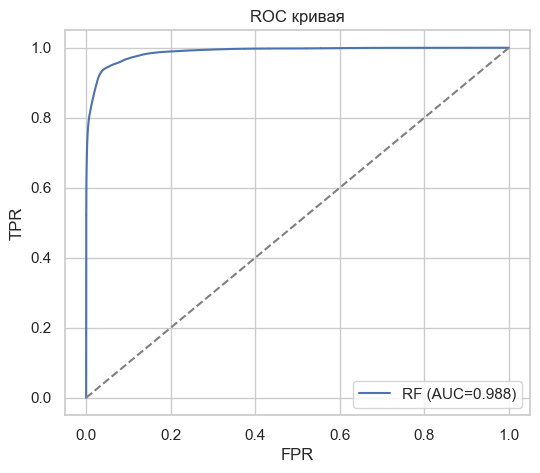

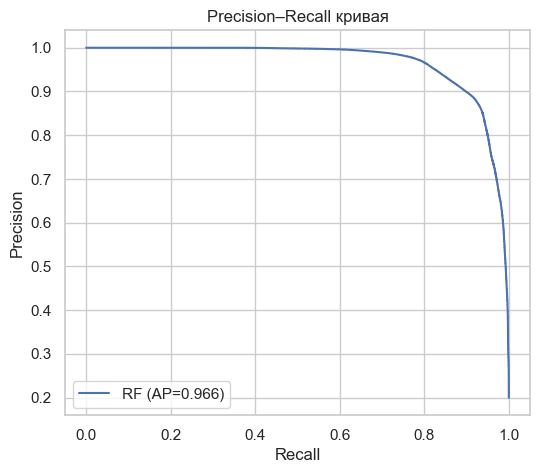

In [29]:
# === –ü–æ–¥–±–æ—Ä –ø–æ—Ä–æ–≥–∞ –ø–æ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–º—É F1 ===
prec, rec, thr = precision_recall_curve(y_test, y_prob)
f1_vals = 2 * (prec * rec) / (prec + rec + 1e-12)
if len(thr) > 0:
    best_idx = np.nanargmax(f1_vals[:-1])
    thr_f1 = thr[best_idx]
    y_pred_f1 = (y_prob >= thr_f1).astype(int)
    print(f"\n@bestF1 threshold={thr_f1:.4f} | "
          f"P={precision_score(y_test, y_pred_f1):.3f} "
          f"| R={recall_score(y_test, y_pred_f1):.3f} "
          f"| F1={f1_score(y_test, y_pred_f1):.3f}")
else:
    print("\n–ù–µ —É–¥–∞–ª–æ—Å—å —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –ø–æ—Ä–æ–≥ –ø–æ F1.")

# === ROC –∫—Ä–∏–≤–∞—è ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'RF (AUC={roc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC –∫—Ä–∏–≤–∞—è"); plt.legend(); plt.show()

# === Precision‚ÄìRecall –∫—Ä–∏–≤–∞—è ===
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'RF (AP={pr:.3f})')
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision‚ÄìRecall –∫—Ä–∏–≤–∞—è"); plt.legend(); plt.show()

–ü–æ—Ä–æ–≥ **(0.6301)** –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å —Ç–æ—á–Ω–æ—Å—Ç—å –∏ –ø–æ–ª–Ω–æ—Ç—É, —Å–Ω–∏–∂–∞—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏–π –ø—Ä–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π –ø–æ—Ç–µ—Ä–µ –ø–æ–ª–Ω–æ—Ç—ã.

–î–∞–∂–µ –±–∞–∑–æ–≤–∞—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ RandomForest —Å —É—á–µ—Ç–æ–º –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –¥–∞–µ—Ç –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ. –î–ª—è –ø—Ä–æ–¥–∞–∫—à–µ–Ω–∞ –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –∫–∞–ª–∏–±—Ä–æ–≤–∫–∞ –ø–æ—Ä–æ–≥–∞, –≤–æ–∑–º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥—Ä—É–≥–∏—Ö –º–æ–¥–µ–ª–µ–π –∏–ª–∏ —Ç—â–∞—Ç–µ–ª—å–Ω–∞—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –Ω–æ —É–∂–µ —Å–µ–π—á–∞—Å –º–æ–¥–µ–ª—å —É–≤–µ—Ä–µ–Ω–Ω–æ –≤—ã—è–≤–ª—è–µ—Ç –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π.

## –û—Ü–µ–Ω–∏–º Feature Importance –≤ –º–æ–¥–µ–ª–∏

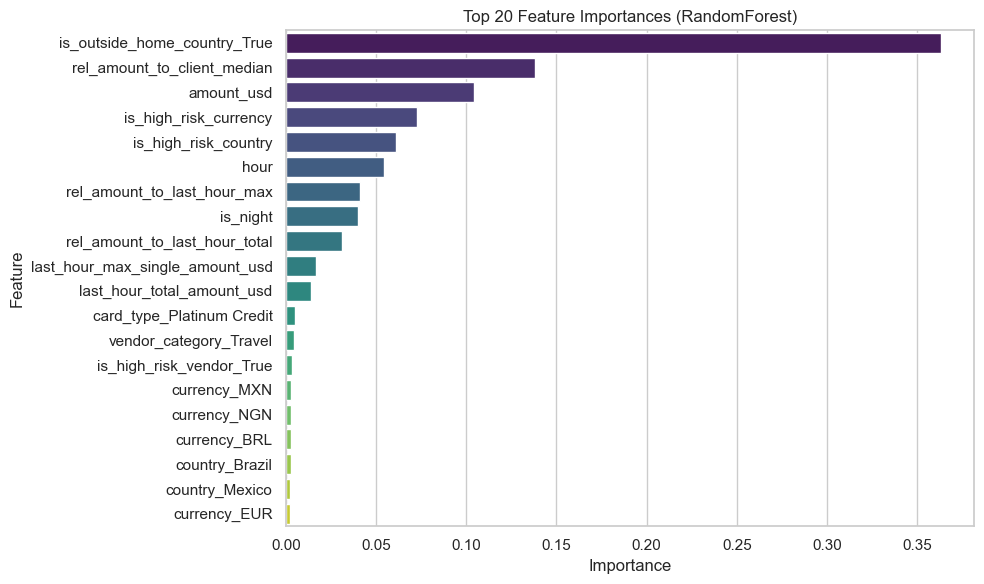

feature  importance
68     is_outside_home_country_True    0.363215
5       rel_amount_to_client_median    0.138317
0                        amount_usd    0.104553
12            is_high_risk_currency    0.072917
13             is_high_risk_country    0.060869
8                              hour    0.054334
6       rel_amount_to_last_hour_max    0.041215
11                         is_night    0.040065
7     rel_amount_to_last_hour_total    0.030918
2   last_hour_max_single_amount_usd    0.016539
1        last_hour_total_amount_usd    0.013821
66        card_type_Platinum Credit    0.005149
21           vendor_category_Travel    0.004330
69         is_high_risk_vendor_True    0.003566
57                     currency_MXN    0.003098
58                     currency_NGN    0.002967
52                     currency_BRL    0.002965
40                   country_Brazil    0.002675
45                   country_Mexico    0.002584
54                     currency_EUR    0.002574

In [ ]:
# –ü–æ–ª—É—á–∞–µ–º –∏–º–µ–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥–∞
ohe = rf_fast.named_steps["preprocessor"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = (
    numeric_features
    + num_cat_features
    + list(ohe_feature_names)
)

# –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç–∏
importances = rf_fast.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–æ–ø-20 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(10, 6))
sns.barplot(
    x="importance",
    y="feature",
    data=feat_imp.head(20),
    palette="viridis"
)
plt.title("Top 20 Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

feat_imp.head(20)